# Data wrangling WeRateDogs Project:

# Introducion/Overview:

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

# Step 1: Gathering Data

In [2]:
#!pip install tweepy

In [2]:
#import all required packages for this Data wrangling project:

import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline

# 1-Twitter Archive file

Downloaded this file manually named'twitter-archive-enhanced.csv'provided by Udacity as a link.

In [4]:
# read csv as a Pandas DataFrame
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [6]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# 2-The Tweet Image Predictions

This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL:
https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

This file has dataset about what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network

In [7]:
#url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
#c=pd.read_csv(url)
#To download URL programatically following code will be used in which we are using request library
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(link)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
df_tweet_image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [8]:
#check how thois file data looks like:
df_tweet_image_prediction.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
df_tweet_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# 3-Additional Data Via Twitter API


Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

Query Twitter Data:
1-using Tweepy to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive.

2-This additional data will include retweet count and favorite count.

# Accessing Project Data Without a Twitter Account:

Here I am Accessing Twitter API data without twitter account and using UDACITY code provided with json txt file.

In [10]:
#To Access Twitter API to create JSON FILE.
#api = tweepy.API(auth, wait_on_rate_limit=True)

In [11]:
#api.verify_credentials()

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
df_api_data = pd.read_json('tweet_json.txt', lines=True)
df_api_data.head() 

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [7]:
#df_twt_cln.rename(columns={'id': 'tweet_id'}, inplace=True)
df_api_data.rename(columns={'id': 'tweet_id'}, inplace=True)

In [8]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

# Step 2: Assessing Data

# Visual assessment of all 3 datasets:

# 1. Twitter Archived Enhanced Data:

Visual assessment:

In [12]:
df_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


By Glancing at data shown above( Visual Assessment),We came to know that column 'name' which displays name of the dog has some invalid or meaningless names which are equal to or less than 2 characters.so we need to look into details of this by programmatic visualisation and later on fix this issue.

# Programmmatic Assessment of Data:

In [13]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Programmatic Assesment of Data:

In [15]:
#Let's check how many rows /cols have name of dogs which is very small or not proper 
df_twitter_archive[df_twitter_archive['name'].apply(len) <= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


Check for any duplication issue in this dataset:

In [16]:
sum(df_twitter_archive['tweet_id'].duplicated())

0

2-Checking 'source' column unique values in URL:

In [17]:
#using pandas.Series.value_counts to return a Series containing counts of unique values.
df_twitter_archive.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [18]:
df_twitter_archive['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [19]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

 The above information shows that there are Quality and Tidiness issues in this datset which needs to be addressed in Cleaning phase before moving on to Analysis.

# Quality Issues :

As far as Quality of data is concerned we must check for any Completeness,Validity,Accuracy and consistency of data.

1-First one is duplication issue in df_tweet_image_prediction: image_predictions.tsv;This is data validity issue and is identified programatically.column jpg_url has many duplicated entries and these must be removed in order to clean data. 

2-In df_twitter_archive data type of column 'timestamp' should be datetime.When doing data analysis, it is important to make sure you are using the correct data types; otherwise you may get unexpected results or errors.

3-In third data frame i.e Twitter API dataframe(df_api_data)retweet_count and favorite_count should be integers not float.

4-In df_twitter_archive dataset 'tweet_id' column should be of object type,not integer.

5-In image prediction data set (df_tweet_image_prediction)dog breed columns(p1,p2,p3)has some data in upper case and some in lower case.It gives our data in theses columns look dirty so we can either convert it to lowercase.

6-Invalid or non standard dog names in Twitter Archive file,Check for their occurences in the dataset and then replace them with None.

7-In Twitter API dataset((df_twt),There is data Duplication Issue in reteweet_count and favorite_count.

8-Visual Assesement of the Twitter archive enhance dataset shows issue in 'source' column with HTML tags url in one column.So cleaning of this column is also on of the quality issues that needs to be addressed.


# Tidiness Issue:

Tidiness Issues:

1-Twitter_archive -These cols show the dog breed (doggo, floofer, pupper and puppo columns)instead of these 4 columns we can make one column' dogitionary' by Melting the doggo, floofer, pupper and puppo columns to dogitionary column.

(2) Information about one type of observational unit (tweets) is spread across three different files/dataframes.

# 2. Image Predictions data:

# Visual Assessment:

In [26]:
df_tweet_image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Results of visual Assesment:

1-Dog breed p1,p2,p3 has no standard,it has sometimes unusual names like 'cab' also appearing and starting with both uppercase and sometimes lowercase.This issue is more likely related to data consistency which must be taken into account while performing data cleaning processs.

2-For Improving data quality and make data more readable and understandable for analysis and visulaisation purpose,we can also make a single column for image prediction and another one column for confidence level.This will make data look tidier too.

# Programmatic Assesment:

In [27]:
#sample() is an inbuilt function of random module in Python that returns a particular length list of items chosen from the sequence i.e. list, tuple, string or set. Used for random sampling without replacement.
df_tweet_image_prediction.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1697,816697700272001025,https://pbs.twimg.com/media/C1V-K63UAAEUHqw.jpg,1,Chihuahua,0.756992,True,Pomeranian,0.052850,True,Maltese_dog,0.047608,True
811,692417313023332352,https://pbs.twimg.com/media/CZv13u5WYAA6wQe.jpg,1,bison,0.208922,False,mink,0.169945,False,polecat,0.144494,False
987,707741517457260545,https://pbs.twimg.com/media/CdJnJ1dUEAARNcf.jpg,1,whippet,0.738371,True,Italian_greyhound,0.191789,True,American_Staffordshire_terrier,0.020126,True
76,667435689202614272,https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg,1,Rottweiler,0.999091,True,miniature_pinscher,0.000450,True,black-and-tan_coonhound,0.000157,True
361,672828477930868736,https://pbs.twimg.com/media/CVZd7ttWcAEs2wP.jpg,1,sandbar,0.118154,False,stingray,0.075915,False,seashore,0.075125,False
13,666082916733198337,https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg,1,pug,0.489814,True,bull_mastiff,0.404722,True,French_bulldog,0.048960,True
1271,749996283729883136,https://pbs.twimg.com/media/CmfoyrrW8AA8v7w.jpg,1,Old_English_sheepdog,0.515319,True,West_Highland_white_terrier,0.151040,True,soft-coated_wheaten_terrier,0.056420,True
502,675870721063669760,https://pbs.twimg.com/media/CWEs1b-WEAEhq82.jpg,1,golden_retriever,0.263892,True,Welsh_springer_spaniel,0.184193,True,beagle,0.182241,True
362,672834301050937345,https://pbs.twimg.com/media/CVZjOktVAAAtigw.jpg,1,Pembroke,0.582560,True,Cardigan,0.258869,True,nipple,0.033835,False
753,688179443353796608,https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg,1,sorrel,0.811520,False,horse_cart,0.024820,False,Arabian_camel,0.015155,False


In [28]:
df_tweet_image_prediction.tail()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [29]:
df_tweet_image_prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg    2
https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg    2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg    2
https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg    2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg    2
                                                  ..
https://pbs.twimg.com/media/ClrK-rGWAAENcAa.jpg    1
https://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg    1
https://pbs.twimg.com/media/C_RAFTxUAAAbXjV.jpg    1
https://pbs.twimg.com/media/DEi_N9qXYAAgEEw.jpg    1
https://pbs.twimg.com/media/Ck18CFcXIAAUWoy.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [30]:
df_tweet_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
df_tweet_image_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01



Let's analyze the duplicated entries.

.duplicated(),duplication issue in df_tweet_image_prediction: image_predictions.tsv;This is data validity issue and is identified programatically.

In [32]:
sum(df_tweet_image_prediction.tweet_id.duplicated())

0

In [33]:
# Duplicated jpg_url.
sum(df_tweet_image_prediction.jpg_url.duplicated())

66

2-The above issue seems to be data validity issue It has duplicated images and consequently double entry.

# 3-Twitter API data:

# Visual Assesment: 

In [34]:
df_api_data

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


# Programmatic Assesment:

In [35]:
df_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [36]:
df_api_data.describe()

,tweet_id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


1-'retweet_count'and 'favorite_count' seems to have duplication issues which must be addressed in Cleaning step.

2-Delete columns that won't be used for analysis.

# Data Cleaning:

# Copying Data:
    First of all we need to copy this data set before making any kind of modifications:

In [37]:
# Copying the df_twitter_archive
df_twitter_archive_cln = df_twitter_archive.copy()

# Copying the df_tweet_image_prediction
df_tweet_image_prediction_cln = df_tweet_image_prediction.copy() 

# Copying the df_twt_raw. 
df_twt_cln = df_api_data.copy()

# After making copies of data we are going to start cleaning process for the issues we highlighted:
  
  


# Issue #1: (Quality Issue)
  
First one is duplication issue in df_tweet_image_prediction: image_predictions.tsv;This is data validity issue and is identified programatically.


In [38]:
# Duplicated jpg_url.
sum(df_tweet_image_prediction_cln.jpg_url.duplicated())

66

Define:
    Remove all duplicated entries in this column 'jpg_url'.

Code:

In [39]:
#df_tweet_image_prediction.drop_duplicates(subset='jpg_url', keep='first', inplace=False)

# dropping ALL duplicate values
df_tweet_image_prediction_cln.drop_duplicates(subset ="jpg_url",
                    keep = False, inplace = True)

Test:

In [40]:
# Duplicated jpg_url.
sum(df_tweet_image_prediction_cln.jpg_url.duplicated())

0

# Issue 2:(Quality Issue)
Issue: Visual Assesement of the Twitter archive enhance dataset shows issue in 'source' column with HTML tags url in one column.So cleaning of this column is also on of the quality issues that needs to be addressed.

Define:

Remove HTML tags and after that Create a new column to store the href, and; Assign to the source column the content between HTML tags.

Code:

In [41]:
# Creating auxiliary list to store the source and source_url.
aux_ls_sr = []
aux_ls_sr_url = [] 

# This loop will remove all HTML tags using .split() and indexing.
for index in df_twitter_archive_cln.source:
    aux_ls_sr.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[1] )
    aux_ls_sr_url.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[0] )

# Updating the source column with aux_ls_sr.
df_twitter_archive_cln.source = aux_ls_sr

# Appending a new column with source_url info.
df_twitter_archive_cln = pd.concat([df_twitter_archive_cln, pd.DataFrame(aux_ls_sr_url, columns = ['source_url'])], axis = 1)

Test:

In [42]:
df_twitter_archive_cln[['tweet_id','source','source_url']].head()

,tweet_id,source,source_url
0,892420643555336193,Twitter for iPhone,http://twitter.com/download/iphone
1,892177421306343426,Twitter for iPhone,http://twitter.com/download/iphone
2,891815181378084864,Twitter for iPhone,http://twitter.com/download/iphone
3,891689557279858688,Twitter for iPhone,http://twitter.com/download/iphone
4,891327558926688256,Twitter for iPhone,http://twitter.com/download/iphone


In [43]:
df_twitter_archive_cln.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

In [44]:
df_twitter_archive_cln.source_url.value_counts()

http://twitter.com/download/iphone              2221
http://vine.co                                    91
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      11
Name: source_url, dtype: int64

In [45]:
df_twitter_archive_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Now we have made column source more readable.

# Issue 3:(Tidiness Issue)

Twitter_archive -These cols show the dog breed (doggo, floofer, pupper and puppo columns)

Define:3. 

Melt the doggo, floofer, pupper and puppo columns to dogitionary column. 


Code:

In [46]:
melt_coumns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in df_twitter_archive_cln.columns.tolist() if x not in melt_coumns]

# Melt the the columns into values
df_twitter_archive_cln = pd.melt(df_twitter_archive_cln, id_vars = stay_columns, value_vars = melt_coumns, 
                         var_name = 'stages', value_name = 'dogtionary')

In [47]:
# Delete column 'stages'
df_twitter_archive_cln = df_twitter_archive_cln.drop('stages', 1)

Test:

In [48]:
df_twitter_archive_cln.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,source_url,dogtionary
3071,783839966405230592,NaN,NaN,2016-10-06 01:23:05 +0000,Twitter for iPhone,This is Riley. His owner put a donut pillow ar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783839966...,13,10,Riley,http://twitter.com/download/iphone,None
5475,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,http://twitter.com/download/iphone,pupper
34,885528943205470208,NaN,NaN,2017-07-13 15:58:47 +0000,Twitter for iPhone,This is Maisey. She fell asleep mid-excavation...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885528943...,13,10,Maisey,http://twitter.com/download/iphone,None
6582,675149409102012420,NaN,NaN,2015-12-11 03:05:37 +0000,Twitter for iPhone,holy shit 12/10 https://t.co/p6O8X93bTQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675149409...,12,10,None,http://twitter.com/download/iphone,None
7696,794926597468000259,NaN,NaN,2016-11-05 15:37:24 +0000,Twitter for iPhone,This is Mack. He's rather h*ckin sleepy. Excep...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/794926597...,12,10,Mack,http://twitter.com/download/iphone,None
6177,694352839993344000,NaN,NaN,2016-02-02 02:53:12 +0000,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/694352839...,10,10,Oliviér,http://twitter.com/download/iphone,None
7158,874680097055178752,NaN,NaN,2017-06-13 17:29:20 +0000,Twitter for iPhone,Meet Cash. He hath acquired a stick. A very go...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874680097...,12,10,Cash,http://twitter.com/download/iphone,None
332,832769181346996225,NaN,NaN,2017-02-18 01:50:19 +0000,Twitter for iPhone,RT @EmilieGambril: 12/10 h*cking excited about...,8.327664e+17,487197737.0,2017-02-18 01:39:12 +0000,https://twitter.com/EmilieGambril/status/83276...,12,10,None,http://twitter.com/download/iphone,None
1268,709556954897764353,NaN,NaN,2016-03-15 01:48:55 +0000,Twitter for iPhone,This is Cecil. She's a Gigglefloof Poofer. Out...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709556954...,12,10,Cecil,http://twitter.com/download/iphone,None
6186,693644216740769793,6.936422e+17,4.196984e+09,2016-01-31 03:57:23 +0000,Twitter for iPhone,BREAKING PUPDATE: I've just been notified that...,NaN,NaN,NaN,NaN,10,10,None,http://twitter.com/download/iphone,None


In [49]:
df_twitter_archive_cln.tail(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,source_url,dogtionary
9399,666353288456101888,NaN,NaN,2015-11-16 20:32:58 +0000,Twitter for iPhone,Here we have a mixed Asiago from the Galápagos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666353288...,8,10,None,http://twitter.com/download/iphone,None
9400,666345417576210432,NaN,NaN,2015-11-16 20:01:42 +0000,Twitter for iPhone,Look at this jokester thinking seat belt laws ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666345417...,10,10,None,http://twitter.com/download/iphone,None
9401,666337882303524864,NaN,NaN,2015-11-16 19:31:45 +0000,Twitter for iPhone,This is an extremely rare horned Parthenon. No...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666337882...,9,10,an,http://twitter.com/download/iphone,None
9402,666293911632134144,NaN,NaN,2015-11-16 16:37:02 +0000,Twitter for iPhone,This is a funny dog. Weird toes. Won't come do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666293911...,3,10,a,http://twitter.com/download/iphone,None
9403,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,http://twitter.com/download/iphone,None
9404,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,Twitter for iPhone,Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,http://twitter.com/download/iphone,None
9405,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,Twitter for iPhone,Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,http://twitter.com/download/iphone,None
9406,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,Twitter for iPhone,Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,http://twitter.com/download/iphone,None
9407,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,Twitter for iPhone,Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,http://twitter.com/download/iphone,None
9408,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,Twitter for iPhone,Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,http://twitter.com/download/iphone,None


In [50]:
df_twitter_archive_cln2=df_twitter_archive_cln.drop_duplicates()

In [51]:
df_twitter_archive_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8151
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2750 non-null   int64  
 1   in_reply_to_status_id       87 non-null     float64
 2   in_reply_to_user_id         87 non-null     float64
 3   timestamp                   2750 non-null   object 
 4   source                      2750 non-null   object 
 5   text                        2750 non-null   object 
 6   retweeted_status_id         219 non-null    float64
 7   retweeted_status_user_id    219 non-null    float64
 8   retweeted_status_timestamp  219 non-null    object 
 9   expanded_urls               2685 non-null   object 
 10  rating_numerator            2750 non-null   int64  
 11  rating_denominator          2750 non-null   int64  
 12  name                        2750 non-null   object 
 13  source_url                  2750 

In [58]:
df_twitter_archive_cln2.tail(25)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,source_url,dogtionary
7236,859607811541651456,NaN,NaN,2017-05-03 03:17:27 +0000,Twitter for iPhone,Sorry for the lack of posts today. I came home...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859607811...,13,10,None,http://twitter.com/download/iphone,puppo
7259,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/855851453...,13,10,None,http://twitter.com/download/iphone,puppo
7463,825535076884762624,NaN,NaN,2017-01-29 02:44:34 +0000,Twitter for iPhone,Here's a very loving and accepting puppo. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825535076...,14,10,None,http://twitter.com/download/iphone,puppo
7465,825120256414846976,NaN,NaN,2017-01-27 23:16:13 +0000,Twitter for iPhone,RT @dog_rates: Say hello to Pablo. He's one go...,8.250266e+17,4.196984e+09,2017-01-27 17:04:02 +0000,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,http://twitter.com/download/iphone,puppo
7466,825026590719483904,NaN,NaN,2017-01-27 17:04:02 +0000,Twitter for iPhone,Say hello to Pablo. He's one gorgeous puppo. A...,NaN,NaN,NaN,https://www.gofundme.com/my-puppys-double-cata...,12,10,Pablo,http://twitter.com/download/iphone,puppo
7481,822872901745569793,NaN,NaN,2017-01-21 18:26:02 +0000,Twitter for iPhone,Here's a super supportive puppo participating ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822872901...,13,10,None,http://twitter.com/download/iphone,puppo
7506,820013781606658049,NaN,NaN,2017-01-13 21:04:55 +0000,Twitter for iPhone,RT @dog_rates: This is Oliver. He has dreams o...,8.199522e+17,4.196984e+09,2017-01-13 17:00:21 +0000,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,http://twitter.com/download/iphone,puppo
7507,819952236453363712,NaN,NaN,2017-01-13 17:00:21 +0000,Twitter for iPhone,This is Oliver. He has dreams of being a servi...,NaN,NaN,NaN,"https://www.gofundme.com/servicedogoliver,http...",13,10,Oliver,http://twitter.com/download/iphone,puppo
7537,816829038950027264,NaN,NaN,2017-01-05 02:09:53 +0000,Twitter for iPhone,RT @dog_rates: This is Betty. She's assisting ...,7.909461e+17,4.196984e+09,2016-10-25 16:00:09 +0000,https://twitter.com/dog_rates/status/790946055...,12,10,Betty,http://twitter.com/download/iphone,puppo
7614,805823200554876929,NaN,NaN,2016-12-05 17:16:37 +0000,Twitter for iPhone,RT @dog_rates: This is Reginald. He's one magi...,7.841832e+17,4.196984e+09,2016-10-07 00:06:50 +0000,"https://vine.co/v/5ghHLBMMdlV,https://vine.co/...",12,10,Reginald,http://twitter.com/download/iphone,puppo


In [59]:
df_twitter_archive_cln2.duplicated().sum()

0

In [60]:
df_twitter_archive_cln2.dogtionary.value_counts()

None       2356
pupper      257
doggo        97
puppo        30
floofer      10
Name: dogtionary, dtype: int64

Similarly in dataset for Twitter API(additional data)we can see that yhere are several columns which are of less or no importance and can be deleted from dataset to make cleaning process more efficient.

# Removing Unnecessary Columns from Dataset:

In [61]:
# Calculates the number of columns.
len(df_twitter_archive_cln2.columns.tolist())

15

In [62]:
df_twitter_archive_cln2.columns.tolist()#display names of columns

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'source_url',
 'dogtionary']

In [63]:
#get the column names of twitter_archive_clean
print(list(df_twitter_archive_cln2))

#CODE: Delete columns no needed
df_twitter_archive_cln = df_twitter_archive_cln.drop(['in_reply_to_status_id',
                                                    'in_reply_to_user_id',
              'retweeted_status_timestamp',
              'retweeted_status_id',
              'retweeted_status_user_id'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'source_url', 'dogtionary']


In [64]:
df_twitter_archive_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8151
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2750 non-null   int64  
 1   in_reply_to_status_id       87 non-null     float64
 2   in_reply_to_user_id         87 non-null     float64
 3   timestamp                   2750 non-null   object 
 4   source                      2750 non-null   object 
 5   text                        2750 non-null   object 
 6   retweeted_status_id         219 non-null    float64
 7   retweeted_status_user_id    219 non-null    float64
 8   retweeted_status_timestamp  219 non-null    object 
 9   expanded_urls               2685 non-null   object 
 10  rating_numerator            2750 non-null   int64  
 11  rating_denominator          2750 non-null   int64  
 12  name                        2750 non-null   object 
 13  source_url                  2750 

2-for Twitter API:

In [65]:
df_twt_cln.columns.tolist()#display names of columns

['created_at',
 'tweet_id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'retweeted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status']

In [66]:
df_twt_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [71]:
#get the column names of twitter_archive_clean
print(list(df_twt_cln))

#CODE: Delete columns no needed
df_twt_cln = df_twt_cln.drop(['in_reply_to_status_id',
                                                    'in_reply_to_user_id',
              'in_reply_to_status_id_str',
              'in_reply_to_user_id_str',
              'in_reply_to_screen_name',
             'possibly_sensitive_appealable',
            'possibly_sensitive',
            'quoted_status_id',
           'quoted_status_id_str',
            'quoted_status'
                              
                             ], 1)

['created_at', 'tweet_id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status']


In [67]:
df_twt_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

# ISSUE 5:(Quality Issue)

Define:

Change 'timestamp'column datatype to datetime.When doing data analysis, it is important to make sure you are using the correct data types; otherwise you may get unexpected results or errors.

Code:

In [68]:
df_twitter_archive_cln2['timestamp'] = pd.to_datetime(df_twitter_archive_cln2['timestamp'])


Test:

In [69]:
df_twitter_archive_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8151
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2750 non-null   int64              
 1   in_reply_to_status_id       87 non-null     float64            
 2   in_reply_to_user_id         87 non-null     float64            
 3   timestamp                   2750 non-null   datetime64[ns, UTC]
 4   source                      2750 non-null   object             
 5   text                        2750 non-null   object             
 6   retweeted_status_id         219 non-null    float64            
 7   retweeted_status_user_id    219 non-null    float64            
 8   retweeted_status_timestamp  219 non-null    object             
 9   expanded_urls               2685 non-null   object             
 10  rating_numerator            2750 non-null   int64           

# Issue#6 (Quality Issue)

Define:

Change datatype for tweet_id to object so that we can have Text or mixed numeric and non-numeric values.object data type can actually contain multiple different types.

In [70]:
df_twitter_archive_cln2['tweet_id'] = df_twitter_archive_cln2['tweet_id'].astype('str')

Test:

In [73]:
df_twitter_archive_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8151
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2750 non-null   object             
 1   in_reply_to_status_id       87 non-null     float64            
 2   in_reply_to_user_id         87 non-null     float64            
 3   timestamp                   2750 non-null   datetime64[ns, UTC]
 4   source                      2750 non-null   object             
 5   text                        2750 non-null   object             
 6   retweeted_status_id         219 non-null    float64            
 7   retweeted_status_user_id    219 non-null    float64            
 8   retweeted_status_timestamp  219 non-null    object             
 9   expanded_urls               2685 non-null   object             
 10  rating_numerator            2750 non-null   int64           

# Issue #7:(Quality Issue)

When we look visually at Image Predictions data it shows dog breeds like 'p1','p2','p3' have some data starting with lowercase letters and some data is displayed with upper case letters start.so it also gives our data in theses columns look dirty so we can either convert it to lowercase.

Define:

In Image predictions data convert p1,p2,p3 to lowercase.

Code:

In [74]:
df_tweet_image_prediction_cln['p1'] = df_tweet_image_prediction_cln['p1'].str.lower()
df_tweet_image_prediction_cln['p2'] = df_tweet_image_prediction_cln['p2'].str.lower()
df_tweet_image_prediction_cln['p3'] = df_tweet_image_prediction_cln['p3'].str.lower()

Test:

In [75]:
df_tweet_image_prediction_cln.p1.head(10)

0    welsh_springer_spaniel
1                   redbone
2           german_shepherd
3       rhodesian_ridgeback
4        miniature_pinscher
5      bernese_mountain_dog
6                box_turtle
7                      chow
8             shopping_cart
9          miniature_poodle
Name: p1, dtype: object

In [76]:
df_tweet_image_prediction_cln.p2.head(10)

0                collie
1    miniature_pinscher
2              malinois
3               redbone
4            rottweiler
5      english_springer
6            mud_turtle
7       tibetan_mastiff
8       shopping_basket
9              komondor
Name: p2, dtype: object

In [77]:
df_tweet_image_prediction_cln.p3.head(10)

0              shetland_sheepdog
1            rhodesian_ridgeback
2                     bloodhound
3             miniature_pinscher
4                       doberman
5     greater_swiss_mountain_dog
6                       terrapin
7                       fur_coat
8               golden_retriever
9    soft-coated_wheaten_terrier
Name: p3, dtype: object

In [78]:
df_tweet_image_prediction.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [79]:
df_tweet_image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# ISSUE 8 (Quality Issue)

Define:

Invalid or non standard dog names in Twitter Archive file,Check for their occurences in the dataset and then replace them with None.

In [80]:
df_twitter_archive_cln2[df_twitter_archive_cln2['name'].apply(len) <= 2] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,source_url,dogtionary
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16+00:00,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,http://twitter.com/download/iphone,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19+00:00,Twitter for iPhone,This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,http://twitter.com/download/iphone,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27+00:00,Twitter for iPhone,RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,http://twitter.com/download/iphone,doggo
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36+00:00,Twitter for iPhone,This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,http://twitter.com/download/iphone,doggo
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08+00:00,Twitter for iPhone,This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,http://twitter.com/download/iphone,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5295,800188575492947969,NaN,NaN,2016-11-20 04:06:37+00:00,Twitter for iPhone,RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,http://twitter.com/download/iphone,pupper
5761,743222593470234624,NaN,NaN,2016-06-15 23:24:09+00:00,Twitter for iPhone,This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,http://twitter.com/download/iphone,pupper
6052,704859558691414016,NaN,NaN,2016-03-02 02:43:09+00:00,Twitter for iPhone,Here is a heartbreaking scene of an incredible...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704859558...,10,10,a,http://twitter.com/download/iphone,pupper
6094,700864154249383937,NaN,NaN,2016-02-20 02:06:50+00:00,Twitter for iPhone,"""Pupper is a present to world. Here is a bow f...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/700864154...,12,10,a,http://twitter.com/download/iphone,pupper


In [81]:
# Inorder To further investigate this issue and check what dog name occurences are in which frequency we use following code?
df_twitter_archive_cln2.name.value_counts()

None         913
a             59
Cooper        14
Oliver        14
Bo            13
            ... 
Binky          1
Ben            1
Alexander      1
Horace         1
Champ          1
Name: name, Length: 957, dtype: int64

Code:
    

In [83]:
# Initialization of non name variable in array
non_names = []

# using a Loop to find non name words.
for index in df_twitter_archive_cln2.name:
    # names are stsrting with uppercase here and non names are with lower case letters.
    if index.islower():
        # If found then it will append to non_names.
        non_names.append(index)

# The list will give us unique names
non_names = list(set(non_names))

# Printing invalid names.
non_names

['life',
 'infuriating',
 'unacceptable',
 'by',
 'light',
 'my',
 'such',
 'all',
 'officially',
 'space',
 'actually',
 'a',
 'his',
 'an',
 'the',
 'this',
 'mad',
 'not',
 'one',
 'incredibly',
 'getting',
 'very',
 'old',
 'quite',
 'just']

The above list of names displayed above has all non-standard names from 'name' column. We can use replace() method to replace it with some meaningful name or 'None'.

In [84]:
#to replace each non standard name (non_name).

mask = df_twitter_archive_cln2.name.str.islower() 
column_name = 'name' 
df_twitter_archive_cln2.loc[mask, column_name] = np.nan
 

Test:

In [85]:
# To check if non standard names are removed from dataset column name or not:
sum(df_twitter_archive_cln2.name.isin(non_names)) 

0

In [86]:
df_twitter_archive_cln2.name.value_counts()

None         913
Cooper        14
Oliver        14
Bo            13
Charlie       13
            ... 
Binky          1
Ben            1
Alexander      1
Horace         1
Champ          1
Name: name, Length: 932, dtype: int64

# Issue 9:Tidiness Issue

In Twitter API dataset:


Define :
    Data Duplication Issue in reteweet_count and favorite_count.

Code:

Check for duplications in id:

In [87]:
sum(df_twt_cln.tweet_id.duplicated())

0

So there is no duplication issue in tweet id

In [88]:
sum(df_twt_cln.retweet_count.duplicated())


630

In [89]:
df_twt_cln.retweet_count.value_counts()

3652    5
1972    5
83      5
819     4
115     4
       ..
1526    1
230     1
1522    1
5616    1
7       1
Name: retweet_count, Length: 1724, dtype: int64

In [90]:
df_twt_cln[['tweet_id','retweet_count','favorite_count']].head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [91]:
sum(df_twt_cln.favorite_count.duplicated())


347

In [92]:
df_twt_cln.favorite_count.value_counts()

0        179
2918       3
2706       3
2768       3
1691       3
        ... 
7493       1
5444       1
5442       1
7489       1
24574      1
Name: favorite_count, Length: 2007, dtype: int64

In [93]:
# dropping ALL duplicate values
df_twt_cln.drop_duplicates(subset ="favorite_count",
                    keep = False, inplace = True)

In [94]:
# dropping ALL duplicate values
df_twt_cln.drop_duplicates(subset ="retweet_count",
                    keep = False, inplace = True)

Test:

In [95]:
sum(df_twt_cln.retweet_count.duplicated())


0

In [96]:
sum(df_twt_cln.favorite_count.duplicated())

0

# Merging Dataset to make one bigger master Dataset:

In [97]:
df_twt_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 0 to 2352
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     1280 non-null   datetime64[ns, UTC]
 1   tweet_id                       1280 non-null   int64              
 2   id_str                         1280 non-null   int64              
 3   full_text                      1280 non-null   object             
 4   truncated                      1280 non-null   bool               
 5   display_text_range             1280 non-null   object             
 6   entities                       1280 non-null   object             
 7   extended_entities              1173 non-null   object             
 8   source                         1280 non-null   object             
 9   in_reply_to_status_id          35 non-null     float64            
 10  in_reply_to_status_id_st

In [98]:
df_twitter_archive_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2750 entries, 0 to 8151
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2750 non-null   object             
 1   in_reply_to_status_id       87 non-null     float64            
 2   in_reply_to_user_id         87 non-null     float64            
 3   timestamp                   2750 non-null   datetime64[ns, UTC]
 4   source                      2750 non-null   object             
 5   text                        2750 non-null   object             
 6   retweeted_status_id         219 non-null    float64            
 7   retweeted_status_user_id    219 non-null    float64            
 8   retweeted_status_timestamp  219 non-null    object             
 9   expanded_urls               2685 non-null   object             
 10  rating_numerator            2750 non-null   int64           

In [99]:
#change datatype of tweet_id to object
df_twt_cln['tweet_id'] = df_twt_cln['tweet_id'].astype('str') 

In [100]:
#df_merge = df_dog_clean.merge(df_tweet_clean, on='tweet_id')

In [101]:
df_tweet_image_prediction_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1943 non-null   int64  
 1   jpg_url   1943 non-null   object 
 2   img_num   1943 non-null   int64  
 3   p1        1943 non-null   object 
 4   p1_conf   1943 non-null   float64
 5   p1_dog    1943 non-null   bool   
 6   p2        1943 non-null   object 
 7   p2_conf   1943 non-null   float64
 8   p2_dog    1943 non-null   bool   
 9   p3        1943 non-null   object 
 10  p3_conf   1943 non-null   float64
 11  p3_dog    1943 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 157.5+ KB


In [102]:
#First part of datasets merging
df_merge_clean = pd.merge(left=df_twitter_archive_cln2 ,
                                 right=df_twt_cln, left_on='tweet_id', right_on='tweet_id', how='inner')

In [103]:
#check results of above join
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1505 entries, 0 to 1504
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1505 non-null   object             
 1   in_reply_to_status_id_x        39 non-null     float64            
 2   in_reply_to_user_id_x          39 non-null     float64            
 3   timestamp                      1505 non-null   datetime64[ns, UTC]
 4   source_x                       1505 non-null   object             
 5   text                           1505 non-null   object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  1481 non-null   object             
 10  rating_numerator        

In [104]:
#change datatype of tweet_id to object
df_tweet_image_prediction_cln['tweet_id'] = df_tweet_image_prediction_cln['tweet_id'].astype('str') 

In [105]:
#second part of merging datasets:
df_merge_clean = df_merge_clean.merge(df_tweet_image_prediction_cln, on='tweet_id', how='inner')

In [106]:
#df_merge_clean = df_merge_clean.merge(df_tweet_image_prediction_cln, on='tweet_id', how='inner')

In [107]:
#df_merge_clean = df_twitter_enhanced_clean.merge(df_tweet_image_prediction_cln, on='tweet_id', how='inner')

In [108]:
df_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1303 non-null   object             
 1   in_reply_to_status_id_x        16 non-null     float64            
 2   in_reply_to_user_id_x          16 non-null     float64            
 3   timestamp                      1303 non-null   datetime64[ns, UTC]
 4   source_x                       1303 non-null   object             
 5   text                           1303 non-null   object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  1303 non-null   object             
 10  rating_numerator        

# Storing Data:

In [109]:
#Store the clean DataFrame in a CSV file
#pandas.DataFrame.to_csv
df_merge_clean.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

In [110]:
# read csv as a Pandas DataFrame
df_twitter_archive_clean = pd.read_csv('twitter_archive_master.csv')
df_twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True


In [111]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1303 non-null   int64  
 1   in_reply_to_status_id_x        16 non-null     float64
 2   in_reply_to_user_id_x          16 non-null     float64
 3   timestamp                      1303 non-null   object 
 4   source_x                       1303 non-null   object 
 5   text                           1303 non-null   object 
 6   retweeted_status_id            0 non-null      float64
 7   retweeted_status_user_id       0 non-null      float64
 8   retweeted_status_timestamp     0 non-null      float64
 9   expanded_urls                  1303 non-null   object 
 10  rating_numerator               1303 non-null   int64  
 11  rating_denominator             1303 non-null   int64  
 12  name                           1245 non-null   o

In [112]:
df_twitter_archive_clean.drop_duplicates(
                    keep = False, inplace = True)

In [114]:
df_twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1303 entries, 0 to 1302
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       1303 non-null   int64  
 1   in_reply_to_status_id_x        16 non-null     float64
 2   in_reply_to_user_id_x          16 non-null     float64
 3   timestamp                      1303 non-null   object 
 4   source_x                       1303 non-null   object 
 5   text                           1303 non-null   object 
 6   retweeted_status_id            0 non-null      float64
 7   retweeted_status_user_id       0 non-null      float64
 8   retweeted_status_timestamp     0 non-null      float64
 9   expanded_urls                  1303 non-null   object 
 10  rating_numerator               1303 non-null   int64  
 11  rating_denominator             1303 non-null   int64  
 12  name                           1245 non-null   o

# Step 5: Analyzing and Visualizing Data

In [115]:
df_twitter_archive_clean['dogtionary'].value_counts()

None       1114
pupper      119
doggo        48
puppo        17
floofer       5
Name: dogtionary, dtype: int64

In [116]:
df_twitter_archive_clean['p1'].value_counts()

golden_retriever      102
labrador_retriever     70
pembroke               66
chihuahua              40
chow                   30
                     ... 
comic_book              1
convertible             1
giant_schnauzer         1
electric_fan            1
ice_bear                1
Name: p1, Length: 286, dtype: int64

In [117]:
df_twitter_archive_clean['p2'].value_counts()

labrador_retriever    74
golden_retriever      57
cardigan              57
pomeranian            33
siberian_husky        27
                      ..
hamper                 1
tick                   1
arabian_camel          1
toilet_seat            1
seashore               1
Name: p2, Length: 298, dtype: int64

In [118]:
df_twitter_archive_clean['p3'].value_counts()

labrador_retriever    46
golden_retriever      32
chihuahua             32
kelpie                24
kuvasz                23
                      ..
ashcan                 1
canoe                  1
plunger                1
sombrero               1
prison                 1
Name: p3, Length: 303, dtype: int64

# Data Visualisation for Most Rated Dogs:

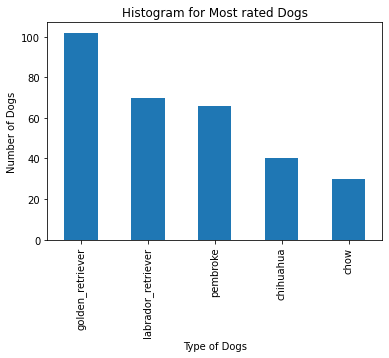

In [119]:
df_dog_type = df_twitter_archive_clean.groupby('p1').filter(lambda x: len(x) >= 30)

df_dog_type['p1'].value_counts().plot(kind = 'bar')
plt.title('Histogram for Most rated Dogs')
plt.xlabel('Type of Dogs')
plt.ylabel('Number of Dogs')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

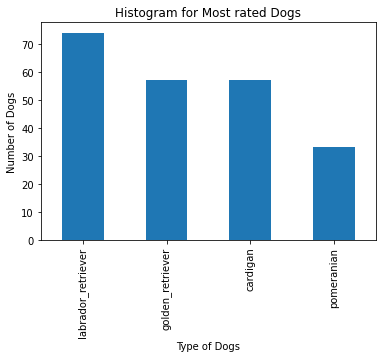

In [120]:
df_dog_type = df_twitter_archive_clean.groupby('p2').filter(lambda x: len(x) >= 30)

df_dog_type['p2'].value_counts().plot(kind = 'bar')
plt.title('Histogram for Most rated Dogs')
plt.xlabel('Type of Dogs')
plt.ylabel('Number of Dogs')


fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

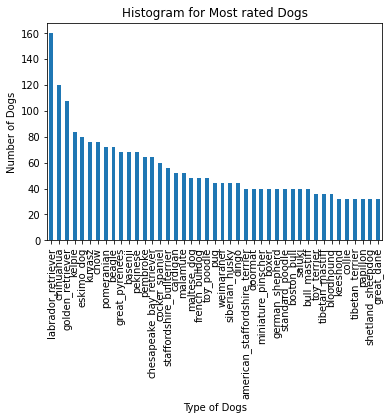

In [108]:
df_dog_type = df_twitter_archive_clean.groupby('p3').filter(lambda x: len(x) >= 30)

df_dog_type['p3'].value_counts().plot(kind = 'bar')
plt.title('Histogram for Most rated Dogs')
plt.xlabel('Type of Dogs')
plt.ylabel('Number of Dogs')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight');

Analysis:

golden_retriever is the most common breed of dogs that is in this dataset.

# Visualisation based on 'DOGTIONARY'(which explians various stages of Dogs)

Various Stages of Dogs Data Partition:(Pie chart)

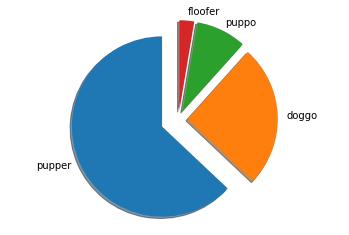

In [121]:

dog_stage_count = list(df_twitter_archive_clean[df_twitter_archive_clean['dogtionary'] != 'None']['dogtionary'].value_counts())[0:4]
plot_stages = df_twitter_archive_clean[df_twitter_archive_clean['dogtionary'] != 'None']['dogtionary'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

#matplotlib.pyplot.subplots
#This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call.
figure, axis = plt.subplots()
#ref:https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.pie.html
axis.pie(dog_stage_count, explode = explode, labels = plot_stages, shadow = True, startangle = 90)
axis.axis('equal')# Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Analysis:
    Based on above visualisation we can infer that Dogs which are in Pupper stage of dog life cycle get most tweets.So they are most popular stage of dogs according to data analysis.

#  Scatter plot between favorites and retweets.

We want to analyse if there is any correlation between Favorite and Retweet

In [122]:
# General configuration for all plots.
font = 12          # X and Y axis fontsize.
font_title = 16    # Graphic's Title fontsize.
transparency = 0.5 # Transparency in cases of scatter plot.
width = 0.7        # Bar width

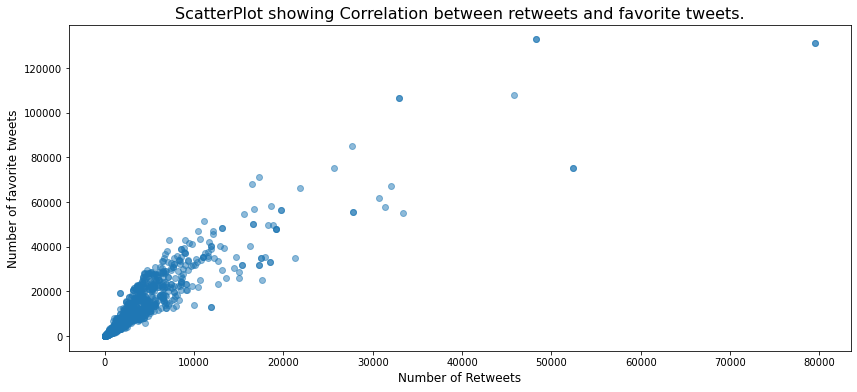

In [123]:
plt.figure(figsize= [14,6])                               # Graphic size
plt.scatter(x = df_twitter_archive_clean['retweet_count'],                  # X axis varibale
            y = df_twitter_archive_clean['favorite_count'],                 # Y axis variable
            alpha = transparency)                         # Transparency
plt.xlabel('Number of Retweets', fontsize = font)         # X label
plt.ylabel('Number of favorite tweets', fontsize = font)         # Y label
plt.title('ScatterPlot showing Correlation between retweets and favorite tweets.',
          fontsize = font_title)     # Graphic Title
plt.show()                                                # Plot the graphic

Analysis:
    The above plot shows there is a positive corelation between number of retweets and favorite tweets.Basically we can  interpret a scatterplot by looking for trends in the data as we go from left to right: If the data show an uphill pattern as we move from left to right, this indicates a positive relationship between X and Y. As the X-values increase (move right), the Y-values tend to increase (move up)

This can be further proved through calculation of or each retweet how many favourites it will generate (in average).

In [124]:

favorites_rate = df_twitter_archive_clean.favorite_count/df_twitter_archive_clean.retweet_count

# Calculating mean n standard deviation
favorites_rate[np.logical_not(df_twitter_archive_clean.favorite_count.isnull())].describe()

count    1303.000000
mean        3.414345
std         1.153693
min         1.097147
25%         2.573548
50%         3.239544
75%         4.043475
max        11.429577
dtype: float64

The above calculations shows that for each new retweet the favourites will increase 3 in average.